# Live-in-Labs Water Consumption Survey Data Analyis
An in-depth analysis of the survey conducted by Team Analytica in the Indian village of Dodeneer to understand the causes of water stress in the region

### What is Live in Labs?
Live-in-Labs® is a multidisciplinary experiential learning program that breaks classroom and lab barriers by applying learned theory in real-world settings. This credit-based academic program draws on principles of lean research for the development and deployment of sustainable solutions for current challenges faced by rural communities in India. By directly living in rural communities (labs) and co-designing solutions to development challenges, program participants gain first-hand knowledge and know-how of identifying and assessing community needs and subsequently developing and implementing viable solutions through various participatory methods.

**Source:**  https://www.amrita.edu/international/live-in-labs

### Why did we conduct this survey?
In the first 4 days of our brief 7-day visit to the village, we spent our time observing the lifestyle of the villagers. We used strategies such as Participatory Rural Analysis(PRA) to identify the most prevalent issues in the village. Through the use of PRA related tools such as venn diagrams, resource maps and problem trees, we 
were able to draw a detailed picture of the needs of the village and **Water was shaping up as an area of concern**.<br>

Furthermore, through the interviews of the villagers and their personas, we realized that water was a significant area of concern and that the villagers had a lot to complain about when the thematic area in consideration was water.<br>

Next, **we needed to come up with a means to corroborate our finds through the PRA framework and the village interviews. Also, it was important for us to identify the main causes of the water shortage(if there was any)**. In order to achieve these two purposes, the data scientist in me decided to conduct a survey where we would collect data from each household in the village and use it to validate and quantify the amount of water-related stress in the village.

### The Survey Methodology

#### Main Research Question
Are the people of Dodeneer suffering from acute water shortage?

#### How was the survey conducted?
* The survey was conducted as in-person interviews where a pre-prepared questionnaire was used as a reference
* The data was first collected by the team on paper and then it was entered into a spreadsheet

#### The Questionnaire
The following questions were asked to each household as a part of our survey :
* What is the medium of water storage in the house?(Tank or Sump or buckets or cans)
* What is a rough estimate of the capacity of the water used by the house per day?
* Does the house have an underground motor(to pump up water)?
* Does the household receive water from the Thariyal water supply, from the in-village borewell source or from both?
* If a household receives water from both sources, which source provides a larger amount of water?
* How many members live in the house?

**Language of Interview :** These questions were asked in the regional languages(Punjabi and Hindi) to the people.<br>
**Extra Help :** The team was also helped by a local guide to help us with the interactions with the villagers

#### Key Considerations that were taken care of while creating the questionnaire
* **Relevance** - Are the questions relevant w.r.t our goals of conducting the survey?
* **Structure** - Are the questions structured in a way so that they can be masked as a natural conversation? This was very important to consider as a normal conversation would cause people to open up more frankly than a definite set of questions being shot at them.
* **Length** - We abstained from making a lengthy questionnaire so that we would not be consuming too much time of a person.
* **Comfort** - In a backward Indian village, not every question will be taken up in the right spirit. So, we decided to refrain from asking questions such as family income as not every household will be willing to give an accurate answer.

### Some Preliminary Information about the Village

#### Name of the Village
**Official Name :** New Thariyal
<br>
**Also called as :** Dodeneer

#### Location
Northern Punjab, India

#### About the People
* **Number of People in the village :** 300+
* **Number of Houses :** 58
* **Major Occupation :** Unskilled, seasonal labour

### State of water in the village (Prior to our study)
* According to several villagers, dearth of water is a problem that cripples their daily routines.
* The main people who are affected by the above problem statement include the labourers as they are often delayed for work if water is late or does not arrive as they are the ones who go to nearby villages to collect water.
* The women of the house are also affected as the household chores are at a standstill when water is not there.
* Teenage girls also find the water issues to be extremely uncomfortable, especially during the times of their menstrual cycles.
* The village has a debt of over 1,50,000 INR on the borewell that belongs to the Government of Punjab, India. All current usage of the borewell is unauthorized and can be shut down at any time. 
* Some houses use underground motors to pump up water from the Thariyal source which is not legal according to the rules set by the Govt. of Punjab, India.

## The Analysis

#### Loading Data

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
df = pd.read_csv("Water_survey_dataset.csv")

# Basic Details about the data
print("Basic details about the dataset: ")
print("Number of entries:",df.shape[0])
print("Number of features:",df.shape[1])

# Viewing the first 5 rows of the data
print("\nFirst 5 rows of the dataset:")
df.head()

Basic details about the dataset: 
Number of entries: 47
Number of features: 9

First 5 rows of the dataset:


,House No.,Sector No.,Choice of Storage,"Capacity(ltrs/number) For 'Cans + Buckets', we have encoded count of both",Motor ?,No. of people,Borewell ?,Thariyal ?,Major Source
0,1,3,Tank,500,1,13,1,1,B
1,2,3,Buckets,12,0,12,1,1,B
2,3,3,Controls the borewell,-,0,17,1,1,B
3,4,3,Buckets,15,0,7,1,0,B
4,6,3,Buckets,15,0,5,1,0,B


#### Data Cleaning
Cleaning the Survey Dataset

##### What needs to be cleaned?
I have written an explicit function to display all the unique values in a given feature. This will help **identify the kind of values** that a feature has. This will further help understand if -
* Features have aberrant values
* Features have **weird-looking** values that do not conform to the feature's name
* There are outliers (this can be looked at as a very inchoate way of identifying outliers in a given feature)

In [2]:
# Function to find the unique values in each feature
def find_unique(df, ignore):
  ''' 
  df -> Pandas Dataframe
  ignore -> Feature Names that are to be ignored (Usually for ignoring identifier features)
  '''
  features = [f for f in df.columns if f not in ignore]
  for feature in features:
    print('\033[31m' + 'Unique Values in : ' + feature +' ' + '\033[0m')
    print(df[feature].value_counts())

# Call the function
find_unique(df, ["House_no"])

Unique Values in : House No. 
55    1
15    1
24    1
23    1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
14    1
26    1
13    1
12    1
11    1
10    1
7     1
6     1
4     1
3     1
2     1
25    1
27    1
54    1
41    1
52    1
51    1
50    1
49    1
48    1
47    1
45    1
44    1
43    1
40    1
28    1
39    1
38    1
37    1
36    1
35    1
33    1
32    1
31    1
29    1
1     1
Name: House No., dtype: int64
Unique Values in : Sector No. 
3    32
2    15
Name: Sector No., dtype: int64
Unique Values in : Choice of Storage 
Buckets                  26
Tank                     11
Cans + Buckets            5
Sump                      2
Cans                      2
Controls the borewell     1
Name: Choice of Storage, dtype: int64
Unique Values in : Capacity(ltrs/number) For 'Cans + Buckets', we have encoded count of both 
4        7
500      6
5        4
10       4
350      3
3        3
6        3
15       2
7        2
12743    1
4247     1
1,2      1
2        1
1000 

* The feature names are **messy**; need to be renamed for ease of use
* Deal with **aberrant** data values
* Dealing with non-uniform measurement scales in **Capacity...** feature

In [3]:
# Renaming the features

col_names = ["House_no", "Sector_no", "Storage", "Capacity", "Motor_presence", "Num_people", "Borewell_source_used", "Thariyal_source_used", "Major_source"]
df.columns = col_names
df.head()

,House_no,Sector_no,Storage,Capacity,Motor_presence,Num_people,Borewell_source_used,Thariyal_source_used,Major_source
0,1,3,Tank,500,1,13,1,1,B
1,2,3,Buckets,12,0,12,1,1,B
2,3,3,Controls the borewell,-,0,17,1,1,B
3,4,3,Buckets,15,0,7,1,0,B
4,6,3,Buckets,15,0,5,1,0,B


##### Dealing with aberrant values
The aberrant value of "-" is in a cell that specifies the storage capacity of a house that has first-hand control over the usage of the borewell in the village. And, it is not too bold a guess if we were to say that **this house has access to a way higher amount of water than any other household in the village**.<br>
So, let's give a value of **10000** to this cell.

In [0]:
# Cleaning up the aberrant cells

## Controls the borewell cell
df.at[2, 'Capacity']=10000

##### Dealing with the non-uniform measurement scales in "Capacity"

For this, we need to engineer a new feature called "Amount" which will depict the total amount of water an individual house gets per day. For this, we need to keep in mind the following conditions from the survey methodology : <br>
* When Storage = "Tank" OR "Controls the borewell", **Amount = Capacity**
* When Storage = "Can", **Amount = Capacity x 50**
* When Storage = "Bucket", **Amount = Capacity x 20**
* When Storage = "Cans + Buckets", Capacity is entered as a tuple of the form (num_of_cans, num_of_buckets). Here, **Amount = (num_of_cans x 50) + (num_of_buckets x 20)**



In [5]:
# Create a feature "Amount" to quantify the amount of water each household received

cnt_rows = df.shape[0]
amount = []
for i in range(cnt_rows) :
  storage = df["Storage"].iloc[i]
  cap = df["Capacity"].iloc[i]
  if(storage=="Cans"):
    amount.append(int(cap)*50)
  elif(storage=="Buckets"):
    amount.append(int(cap)*20)
  elif(storage=="Cans + Buckets"):
    split_cap = cap.split(",")
    amount.append((int(split_cap[0])*50) + (int(split_cap[1])*20))
  else:
    amount.append(int(cap))

# load the "amount" list as a feature by the same name
df["Amount"] = amount

# We can get rid of the "Capacity" feature now
df = df.drop("Capacity", axis=1)

# View the dataset
df.head()


,House_no,Sector_no,Storage,Motor_presence,Num_people,Borewell_source_used,Thariyal_source_used,Major_source,Amount
0,1,3,Tank,1,13,1,1,B,500
1,2,3,Buckets,0,12,1,1,B,240
2,3,3,Controls the borewell,0,17,1,1,B,10000
3,4,3,Buckets,0,7,1,0,B,300
4,6,3,Buckets,0,5,1,0,B,300


#### Feature Engineering
Creating new features with existing features

The amount of water a household gets is **incomplete**. This is because the **number of people in a house** is subject to **variance**. So, we need to take that parameter into consideration too if we are to quantify water stress in the village effectively.<br>
So, we create the **Water_per_person_per_day** feature.

In [6]:
# "Water/person" for each household
df["Water_per_person_per_day"] = df["Amount"]/df["Num_people"]
df.head()

,House_no,Sector_no,Storage,Motor_presence,Num_people,Borewell_source_used,Thariyal_source_used,Major_source,Amount,Water_per_person_per_day
0,1,3,Tank,1,13,1,1,B,500,38.461538
1,2,3,Buckets,0,12,1,1,B,240,20.000000
2,3,3,Controls the borewell,0,17,1,1,B,10000,588.235294
3,4,3,Buckets,0,7,1,0,B,300,42.857143
4,6,3,Buckets,0,5,1,0,B,300,60.000000


There are two sources of water in the village - 
* The unauthorized **borewell**
* The central water supply from the nearby village of **Thariyal**
We can see that certain households get water from both supplies.<br>
So, let's create a feature **Both** to make this information easily discernible for later analysis.

In [7]:
# "Both" feature indicates whether a particular house gets water from both the sources in question
df["Both"] = df["Borewell_source_used"] + df["Thariyal_source_used"]
df.head()

,House_no,Sector_no,Storage,Motor_presence,Num_people,Borewell_source_used,Thariyal_source_used,Major_source,Amount,Water_per_person_per_day,Both
0,1,3,Tank,1,13,1,1,B,500,38.461538,2
1,2,3,Buckets,0,12,1,1,B,240,20.000000,2
2,3,3,Controls the borewell,0,17,1,1,B,10000,588.235294,2
3,4,3,Buckets,0,7,1,0,B,300,42.857143,1
4,6,3,Buckets,0,5,1,0,B,300,60.000000,1


#### Visualizing the Water Scenario
Graphs and plots to visualize the dataset

First, we need to have an idea of the **Storage Scenario** at the village. The following code does exactly that.

In [0]:
sns.set_style('darkgrid')

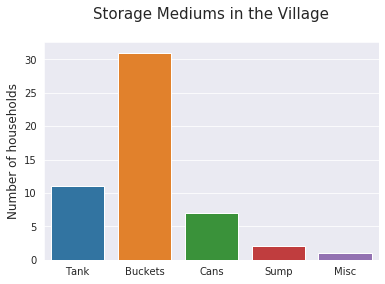

In [42]:
# The distribution of storage mediums in the village
storage = df["Storage"]
medium={"Tank":0, "Buckets":0, "Cans":0, "Sump":0, "Misc":0}
for s in storage:
  if("Cans" in s):
    medium["Cans"]+=1
  if("Buckets" in s):
    medium["Buckets"]+=1
  if("Tank" in s):
    medium["Tank"]+=1
  if("Sump" in s):
    medium["Sump"]+=1
  if("Controls the borewell" in s):
    medium["Misc"]+=1

# Plot the mediums of storage
x = list(medium.keys())
y = list(medium.values())
sns.barplot(x, y)
plt.title("Storage Mediums in the Village\n",fontsize=15)
plt.ylabel("Number of households",fontsize=12)
plt.show()


Buckets are the most common form of water storage in the village, followed by Tanks.<br>

**NOTE :** Misc includes the single house where the household is incharge of the borewell and they don't need to store water.

Let's have a look at the relation between the amount of water and the presence of motor in a household.<br>
Using a box-plot, we have

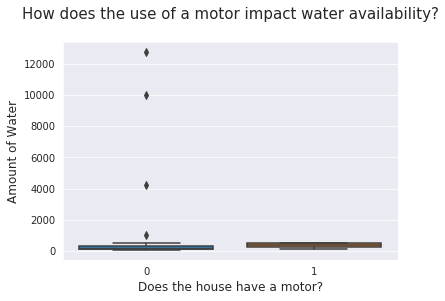

In [41]:
# Num of people vs Amount based on Motor presence

sns.boxplot(y = "Amount", x = "Motor_presence", data=df)
plt.title("How does the use of a motor impact water availability?\n", fontsize=15)
plt.xlabel("Does the house have a motor?", fontsize=12)
plt.ylabel("Amount of Water", fontsize=12)
plt.show()

This does not look so convincing, because of the existence of outlier values (The sumps and the house that that controlls the borewell).<br>
So, let's take them off for better data analysis.

In [0]:
## Remove outliers from the Amount feature
remove_outliers = df[df["Amount"]<4000]

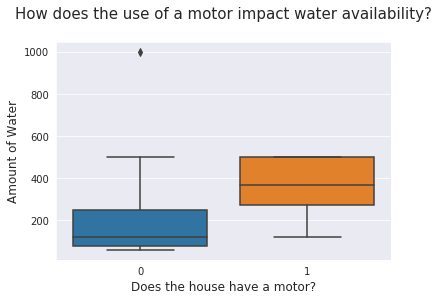

In [40]:
# Same box plot as before
sns.boxplot(y = "Amount", x = "Motor_presence", data=remove_outliers)
plt.title("How does the use of a motor impact water availability?\n", fontsize=15)
plt.xlabel("Does the house have a motor?", fontsize=12)
plt.ylabel("Amount of Water", fontsize=12)
plt.show()

**We can see that households using motor receive more water on an average than those not using it.**

Let us find out how much water each person in the village gets using a density ditribution curve.

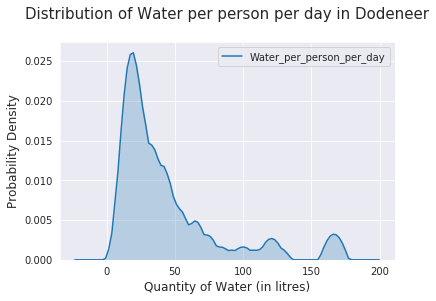

In [39]:
# Remove outliers
sns.kdeplot(remove_outliers["Water_per_person_per_day"], shade=True, kernel="cos")
plt.title("Distribution of Water per person per day in Dodeneer\n", fontsize=15)
plt.xlabel("Quantity of Water (in litres)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.show()

**The above density plot shows a huge disparity between the haves and the have-nots!**

The above graph definitely shows that there is an imabalanced distribution of water across the village. But, a few questions arise from that plot.
* What is the **severity** of this imabalance?
* Do people have enough water for their daily activities and chores?
<br><br>
According to the United Nations, the minimum water requirement per person per day is 50 litres. So, let's see how many people actually get that much water per day.

In [35]:
# Let's set the minimum water required per person per day as 50 litres [acc. to UN]
def meets_water_requirement(x):
  if (x>=50):
    return "Yes"
  return "No"

df["Meets_water_requirement"] = df["Water_per_person_per_day"].apply(meets_water_requirement)
df.head()

,House_no,Sector_no,Storage,Motor_presence,Num_people,Borewell_source_used,Thariyal_source_used,Major_source,Amount,Water_per_person_per_day,Both,Meets_water_requirement
0,1,3,Tank,1,13,1,1,B,500,38.461538,2,No
1,2,3,Buckets,0,12,1,1,B,240,20.000000,2,No
2,3,3,Controls the borewell,0,17,1,1,B,10000,588.235294,2,Yes
3,4,3,Buckets,0,7,1,0,B,300,42.857143,1,No
4,6,3,Buckets,0,5,1,0,B,300,60.000000,1,Yes


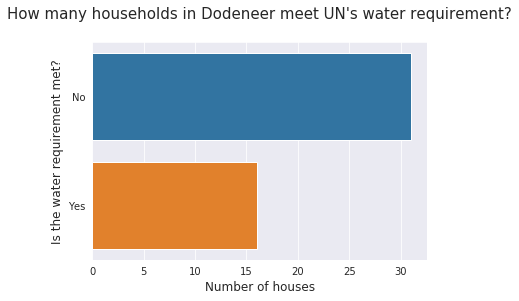

In [38]:
# Water requirements met?
sns.countplot(y="Meets_water_requirement", data=df)
plt.title("How many households in Dodeneer meet UN's water requirement?\n", fontsize=15)
plt.xlabel("Number of houses", fontsize=12)
plt.ylabel("Is the water requirement met?", fontsize=12)
plt.show()

**The number of households where the basic water requirements of each person is not met are almost twice the number of those households where these requirements are met!!**
<br><br>
Indeed, the water imbalance is highly prevalent in Dodeneer. 

The **Sector** column depicts the sector in which the given house falls. We had divided the whole village into 4 sectors based on the physical attributes of the houses and lanes in each part of the village. There were 4 sectors (1,2,3,4) out of which only sectors 2 and 3 were inhabited by people.
* Sector 2 - Most households here had members who were skilled professionals like doctors, teachers, engineers etc.
* Sector 3 - Most households were directly dependent on skilled and unskilled (predominantly seasonal) labour
<br><br>

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


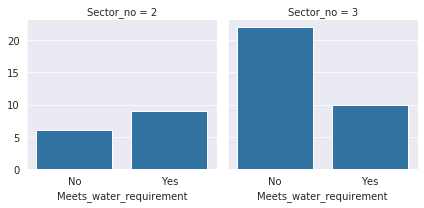

In [45]:
# Sector wise grouping based on Meets water requirement

g = sns.FacetGrid(df, col="Sector_no")
g.map(sns.countplot, "Meets_water_requirement")
plt.show()

* In sector 2, there are more households where the water requirements are met than those where it is not.
* In sector 3 however, more households have issues with basic water requirements than not. 

#### Conclusion
From the above visualizations and analysis, it was evident to the team that our initial understanding of Dodeneer's water trouble was correct and we were able to confirm our PRA's finds.
<br>
<br>
Now, that we had our central idea, we were able to work strongly towards a solution that could benefit the village. We have published our finds and the solution in our paper titled **"The Impact of Water Distribution Inconsistency in the Rural Settlements of Punjab and to Extrapolate a Nature Based Sustainable Technology to Enhance Livelihood"** which has been accepted at the ICDSMLA 2019 conference indexed by Scopus.